<a href="https://colab.research.google.com/github/rishikam23/SVM-Parameter-Optimization-on-UCI-Letter-Recognition-Dataset/blob/main/SVM_Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the UCI Letter Recognition Dataset
path="/content/drive/MyDrive/letter-recognition.data"
cols=['letter','x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
data=pd.read_csv(path,header=None,names=cols)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
data.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
#Data preprocessing
#Encoding the target column
le=LabelEncoder()
data['letter']=le.fit_transform(data['letter'])

Class Distribution

letter
20    813
3     805
15    803
19    796
12    792
0     789
23    787
24    786
13    783
16    783
5     775
6     773
4     768
1     766
21    764
11    761
17    758
8     755
14    753
22    752
18    748
9     747
10    739
2     736
7     734
25    734
Name: count, dtype: int64


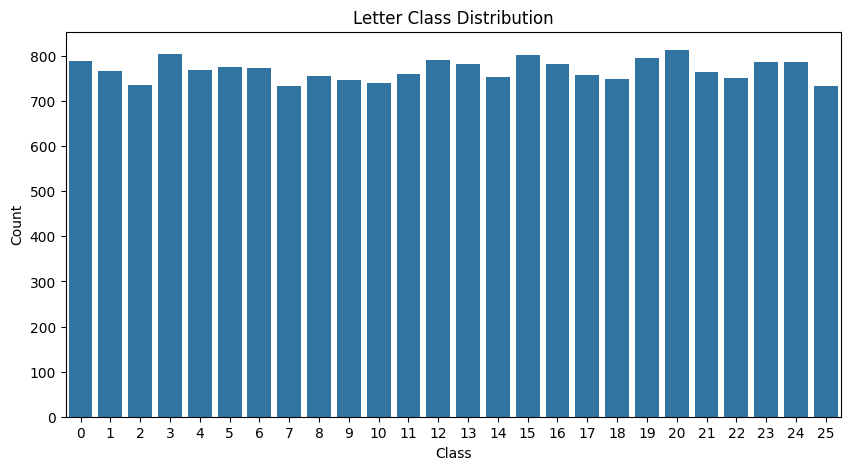

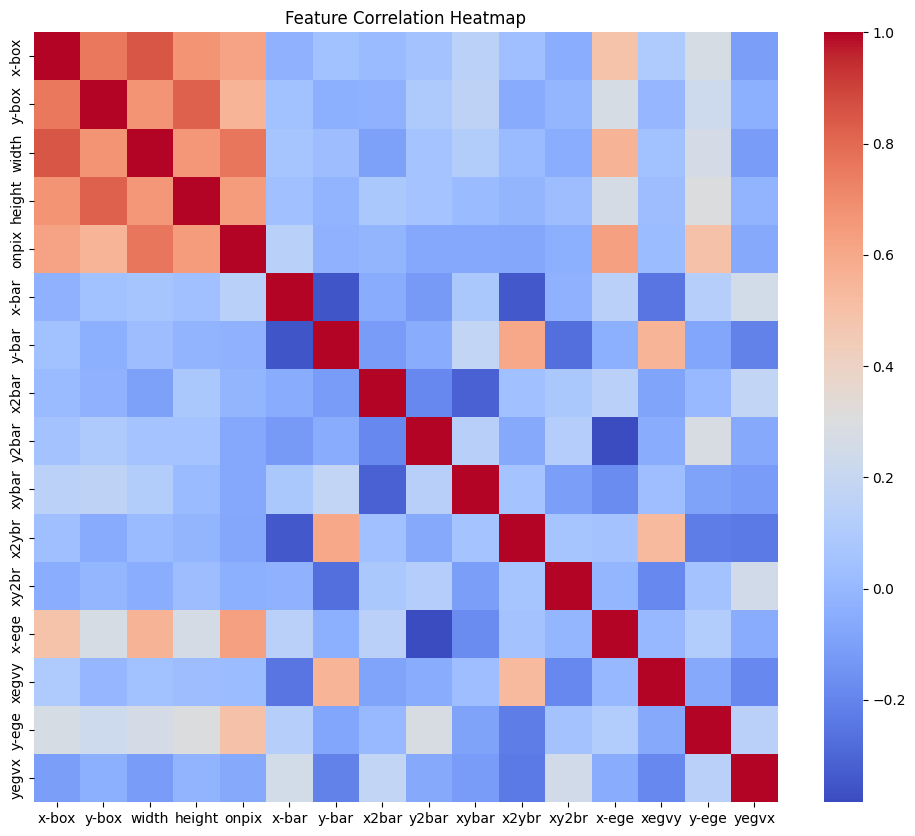

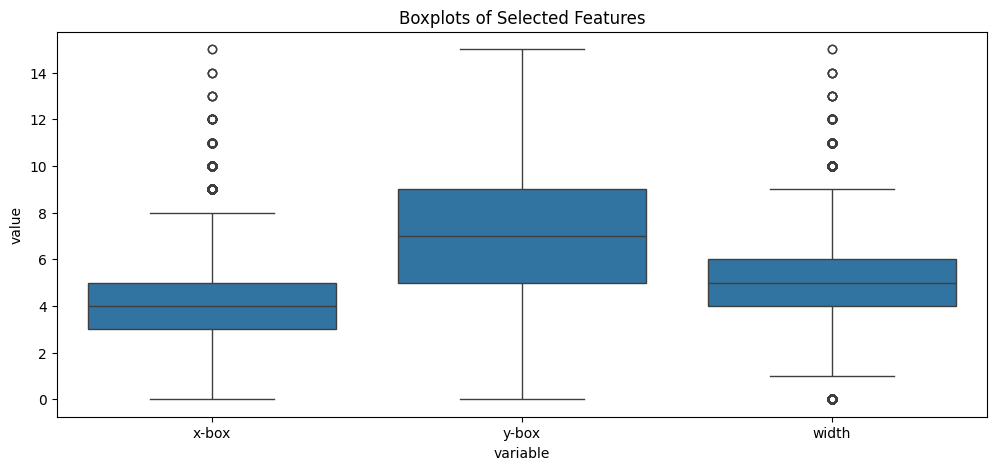

In [ ]:
#Performing EDA
#Class distribution
print("Class Distribution\n")
print(data['letter'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='letter',data=data)
plt.title("Letter Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.drop('letter',axis=1).corr(),cmap='coolwarm',annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot for a few features
plt.figure(figsize=(12,5))
feat=['x-box','y-box','width']
data_melted=data.melt(id_vars='letter', value_vars=feat)
sns.boxplot(x='variable', y='value',data=data_melted)
plt.title("Boxplots of Selected Features")
plt.show()

In [ ]:
X=data.drop('letter',axis=1)
y=data['letter']

# Normalizing features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
results=[]
all_trials={}

In [ ]:
#Optuna objective function
def objective(trial,X_train,y_train,X_test,y_test):
    kernel=trial.suggest_categorical('kernel',['linear','rbf','poly','sigmoid'])
    nu=trial.suggest_float('nu',0.01,1.0)
    clf=NuSVC(kernel=kernel,nu=nu)
    try:
        clf.fit(X_train, y_train)
    except ValueError:
        return 0.0
    preds=clf.predict(X_test)
    acc=accuracy_score(y_test,preds)
    return acc

In [ ]:
#Parameter Optimization for 10 samples
best_accuracy=-float('inf')
best_study=None
best_index=-1
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=i)
    study=optuna.create_study(direction='maximize')
    study.optimize(lambda trial:objective(trial,X_train,y_train,X_test,y_test),n_trials=100)
    best_trial=study.best_trial
    acc=best_trial.value
    params=best_trial.params
    sample_label=f'S{i+1}'
    results.append({
        'Sample':sample_label,
        'Best Accuracy':acc,
        'Best Params':params
    })
    all_trials[sample_label]=study
    if acc > best_accuracy:
        best_accuracy=acc
        best_study=study
        best_index=i

[I 2025-04-19 16:33:41,561] A new study created in memory with name: no-name-9bf758bf-366f-4014-8970-85110c240caf
[I 2025-04-19 16:34:25,402] Trial 0 finished with value: 0.5516666666666666 and parameters: {'kernel': 'sigmoid', 'nu': 0.3804322096459148}. Best is trial 0 with value: 0.5516666666666666.
[I 2025-04-19 16:34:30,078] Trial 1 finished with value: 0.556 and parameters: {'kernel': 'linear', 'nu': 0.0264097729104434}. Best is trial 1 with value: 0.556.
[I 2025-04-19 16:34:30,087] Trial 2 finished with value: 0.0 and parameters: {'kernel': 'poly', 'nu': 0.943758195981858}. Best is trial 1 with value: 0.556.
[I 2025-04-19 16:34:52,241] Trial 3 finished with value: 0.416 and parameters: {'kernel': 'sigmoid', 'nu': 0.2636990272642303}. Best is trial 1 with value: 0.556.
[I 2025-04-19 16:35:10,869] Trial 4 finished with value: 0.4186666666666667 and parameters: {'kernel': 'poly', 'nu': 0.9207987979561092}. Best is trial 1 with value: 0.556.
[I 2025-04-19 16:35:23,623] Trial 5 finish

In [ ]:
#Storing results
results_df=pd.DataFrame(results)
print("SVM Optimization Results\n")
print(results_df.sort_values(by='Best Accuracy',ascending=False).reset_index(drop=True))

SVM Optimization Results

  Sample  Best Accuracy                                     Best Params
0     S1       0.972833    {'kernel': 'rbf', 'nu': 0.01091321533781647}
1     S6       0.971000    {'kernel': 'rbf', 'nu': 0.02845683795601642}
2     S8       0.970667   {'kernel': 'rbf', 'nu': 0.010187367132822459}
3    S10       0.970500   {'kernel': 'rbf', 'nu': 0.012347602301466358}
4     S3       0.969667    {'kernel': 'rbf', 'nu': 0.01145259207891994}
5     S4       0.969500   {'kernel': 'rbf', 'nu': 0.017042203812320536}
6     S9       0.968833   {'kernel': 'rbf', 'nu': 0.036090231578583924}
7     S7       0.966833    {'kernel': 'rbf', 'nu': 0.02307483825426096}
8     S5       0.965333   {'kernel': 'rbf', 'nu': 0.028864719552798013}
9     S2       0.948167  {'kernel': 'poly', 'nu': 0.016685609173200753}


In [ ]:
results_df.to_csv('svm_optimization_results.csv',index=False)

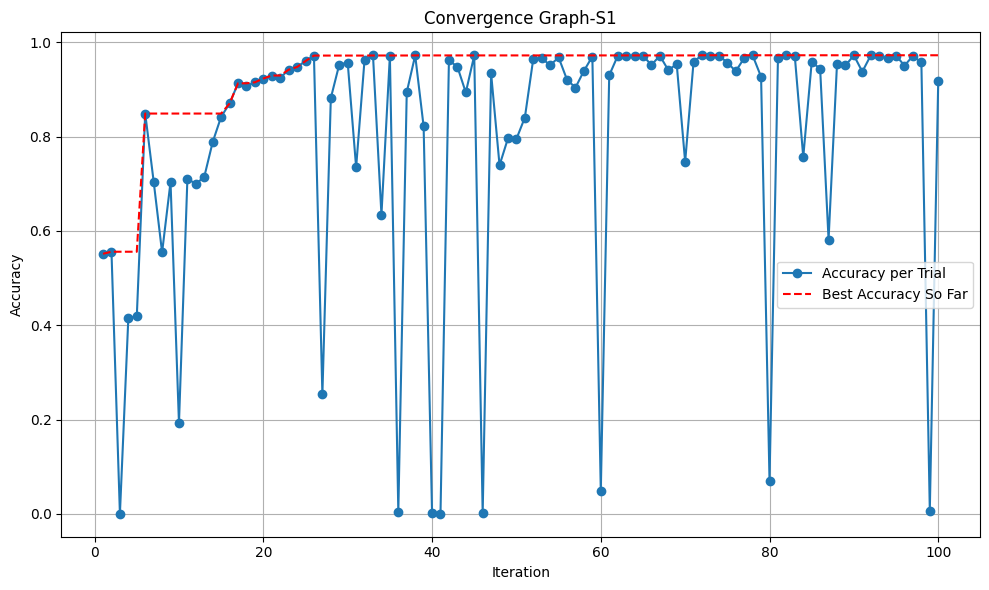

In [ ]:
#Convergence graph with best-so-far overlay
accs=[t.value for t in study.trials]

# Cumulative best-so-far accuracy
best_so_far=[]
current_best=0
for val in accs:
    current_best=max(current_best,val)
    best_so_far.append(current_best)

plt.figure(figsize=(10,6))
plt.plot(range(1,len(accs)+1),accs,marker='o',label='Accuracy per Trial')
plt.plot(range(1,len(accs)+1),best_so_far,color='red',linestyle='--',label='Best Accuracy So Far')
plt.title(f'Convergence Graph-{best_sample_label}')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('convergence_graph.png', dpi=300)
plt.show()